<a href="https://colab.research.google.com/github/Sharukhpatan03/solar-energy-/blob/main/project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------------
# 1. Import Libraries
# -----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# -----------------------------------
# 2. Load Data
# -----------------------------------
plant1 = pd.read_csv('/content/drive/MyDrive/Final_Merged_Plant_1.csv')
plant2 = pd.read_csv('/content/drive/MyDrive/Final_Merged_Plant_2.csv')

plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'])
plant2['DATE_TIME'] = pd.to_datetime(plant2['DATE_TIME'])

plant1['PLANT'] = 'Plant_1'
plant2['PLANT'] = 'Plant_2'
combined_df = pd.concat([plant1, plant2], ignore_index=True)

In [4]:
# -----------------------------------
# 3. Data Preprocessing
# -----------------------------------
# Drop rows with any null values
combined_df.dropna(inplace=True)

# Feature Selection
features = ['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']
target = 'AC_POWER'

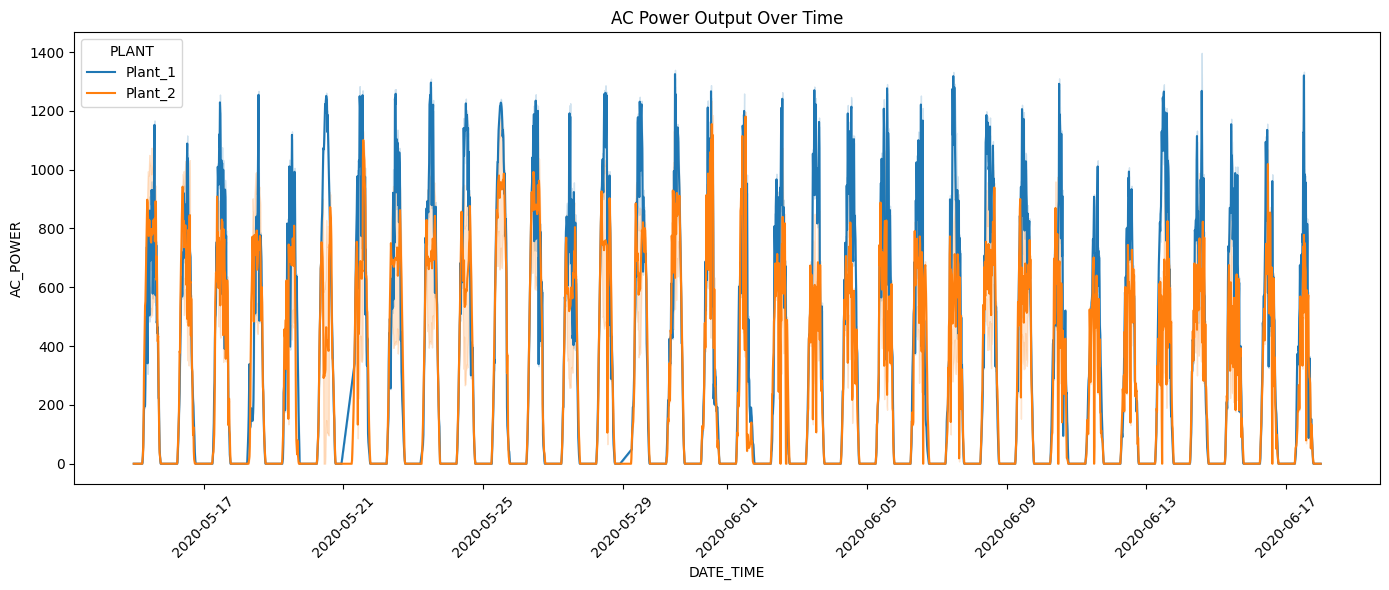

In [5]:
# -----------------------------------
# 4. Exploratory Data Analysis (EDA)
# -----------------------------------
# Power trend over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_df, x='DATE_TIME', y='AC_POWER', hue='PLANT')
plt.title('AC Power Output Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

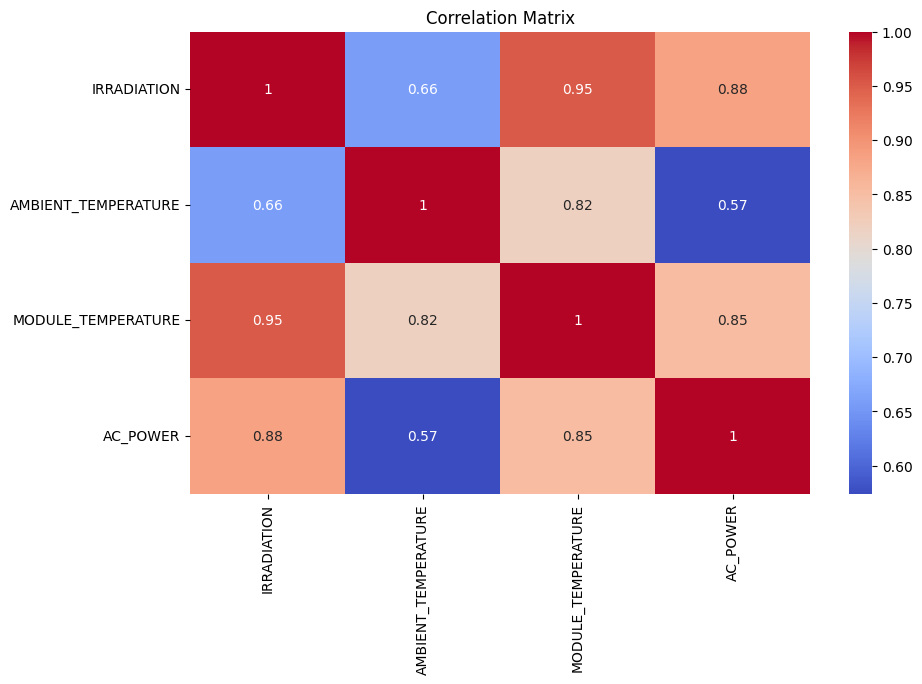

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df[features + ['AC_POWER']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# -----------------------------------
# 5. Feature Engineering + Scaling
# -----------------------------------
X = combined_df[features]
y = combined_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# -----------------------------------
# 6. Model Development (Random Forest)
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# -----------------------------------
# 7. Model Evaluation
# -----------------------------------
import numpy as np
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 49.226546240661285
Root Mean Squared Error (RMSE): 150.5683245234378
R² Score: 0.8436340539576612


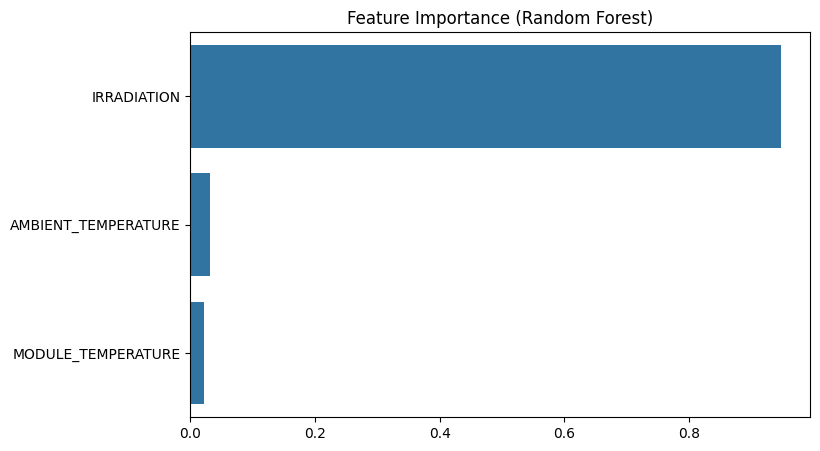

In [12]:
# -----------------------------------
# 8. Feature Importance Visualization
# -----------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title('Feature Importance (Random Forest)')
plt.show()